## Машинное обучение, ФКН ВШЭ

## Практическое задание 3

### Общая информация
Дата выдачи: 22.09.2018

Мягкий дедлайн: 7:59MSK 02.10.2018

Жесткий дедлайн: 23:59MSK 03.10.2018

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
df=pd.read_csv('./data/homework-practice-03-data.csv')

## Линейная регрессия из коробки

#### 1. [0.5 балла] Разбейте выборку, загруженную в ячейке выше в переменную `df`, на обучающую и тестовую части в соотношении 8:2.

In [3]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2)
test_data.head() 

,f0,f1,f2,f3,f4,f5,f6
60,20.29,3.21,-6.820608,-4.066821,0.397257,0.332452,1728.113400
93,16.32,4.30,4.326544,5.100863,0.581082,0.689513,50.240690
163,13.81,2.00,7.327647,-7.188957,0.927212,0.380530,25298.977000
202,13.00,2.00,-2.444963,2.836451,0.858777,0.044972,3234.233400
52,34.81,5.20,9.767477,-3.187185,0.456520,2.519590,41.020397


#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$:
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

y_train = train_data["f1"]
x_train = train_data.drop(["f1"], axis=1)
y_test = test_data["f1"]
x_test = test_data.drop(["f1"], axis=1)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train, y_train)
print('Linear regression score: %.4f' % r2_score(y_test, lr.predict(x_test)))

lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
print('Lasso score: %.4f' % r2_score(y_test, lr.predict(x_test)))

Linear regression score: 0.2471
Lasso score: 0.2471


#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [5]:
print('Amount of zero params in linear regression: ', lr.coef_.size - np.count_nonzero(lr.coef_))
print('Amount of zero params in LASSO: ', lasso.coef_.size - np.count_nonzero(lasso.coef_))
print(lasso.coef_)

Amount of zero params in linear regression:  0
Amount of zero params in LASSO:  1
[0.96437252 0.0193724  0.         0.03810253 0.10637844 0.07630644]


LASSO занулил 1 параметр - f3

#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной?

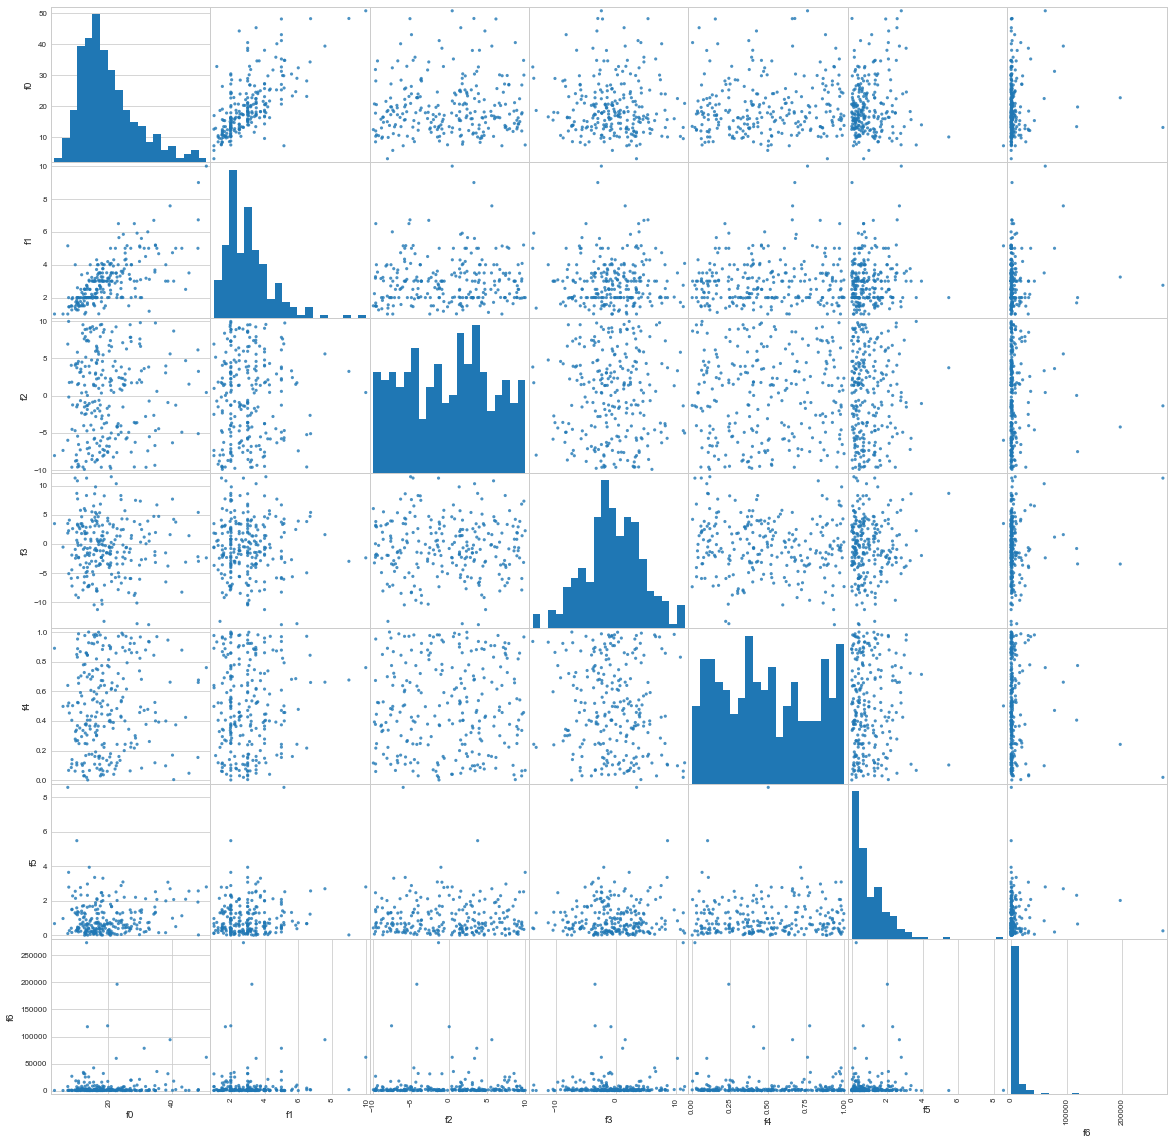

In [11]:
grr = pd.plotting.scatter_matrix(df, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=10, alpha=.8)

На графике пересечения признаков f1 и f3 особых примет не наблюдается.